# Generating NLP Tools for the Road to Presidency 

The United States presidential campaigns have been and will always be a worldwide hot topic due to its influence in global economy. In the 2016 presidential elections, Social Media played a predominant role enabling people to share comments and opinions that influenced the final outcome. According to The New York Times, “Twitter was the largest source of breaking news on the day, with 40 million election-related tweets sent by 10:00 p.m. that day”.

In the following scripts, we use **Natural Language Processing** techniques to analyze Twitter data related to the 2016 Grand Old Party (GOP) Debates, and support decision making related to political campaigns. We propose a process in which, through *sentiment analysis* and *text generation* techniques, we are able to answer the questions of *How People Feel, What people say*, and *What should candidates say*?


# Sentiment Analysis for Twitter Data

Since its creation in the year 2006, Twitter has become one of the main social media platforms to express personal opinion. Despite the fact that a Tweet is restricted to 280 characters (was at 140 up until 2017), this quantity is enough for a user to fully express their opinion, and for analysts to understand how a specific topic is being perceived by Twitter users. 

Through the application of Sentiment Analysis of Tweets related to campaign events, candidates can get insights on the impact they have on the public. The Sentiment analysis model and Tweet Generation will be trained with the 2016 GOP Debate Twitter dataset. Considering that we are at the verge of the 2020 primary debates, the objective of this model is not only understanding the sentiment of past Tweets, but also for applying it to future debates or political events.

## Overview - Completed Analysis

In this notebook, we have divided our analysis in two parts. The first approach taken to generate the sentiment analysis will be done with a standard NLP Approach (like thought in class). The second approach taken to generate the sentiment analysis will be done with a neural network. In the end, we will compare both methods to define which approach was capable of generating the better results. 

# A. Sentiment Analysis with Standard NLP Approach

## Import the Librairies

First, we will import all the necessary librairies for the extent of this first analysis. Some of these librairies include packages like NLTK and pandas.

In [3]:
import os.path
import csv
import pandas as pd
import nltk

import warnings
warnings.filterwarnings("ignore")

## 1. Load the Dataset

In this notebook, like in the others, we will be using a dataset that comprised of opinionated Tweets related to presidential candidate speeches, during the 2016 GOP Debate, to train a sentiment analysis model, which will be used to understand the overall sentiment of the audience through tweeted data, scoring the actual sentiment. 

The dataset has been taken from this website: https://www.kaggle.com/kaxilnaik/twitter-sentiment-analysis-us-elections/data

The dataset it comprised of tens of thousands of Tweets about the early August 2016 GOP debate in Ohio with contributors asked to do both sentiment analysis and data categorization. Contributors were asked if the Tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given Tweet. We've removed the non-relevant messages from the uploaded dataset.

The dataset used has 13,871 tweets related to the GOP Debate. All of them are labeled with three possible options: Positive, Neutral or Negative. 

For our Sentiment Analysis only two columns will be used: **'text'** (column containing the tweets), and **'sentiment'** (label corresponding to each tweet). Other columns such as candidates, subject, retweets, timezone and location provide more information about the Tweets but are not considered for the sentiment analysis.

We have saved the dataset into a csv file name Sentiment 4, from which we will input the column names mentioned below.

In [8]:
def loadDataset(in_file):
    my_path = os.getcwd()
    path = os.path.join(my_path, in_file)
    column_names = ['candidate','sentiment', 'subject', 'retweets', 'text', 'location', 'timezone']
    tweets = pd.read_csv(path, delimiter=',', quotechar='"', header= None, names= column_names, encoding="ISO-8859-1")

    print('Readed ', len(tweets), "tweets")
    return tweets

In [9]:
raw_training_data = loadDataset("Sentiment_4.csv")
raw_training_data.head()

Readed  13871 tweets


,candidate,sentiment,subject,retweets,text,location,timezone
1,No candidate mentioned,Neutral,None of the above,5,RT @NancyLeeGrahn: How did everyone feel about...,Unknown,Quito
2,Scott Walker,Positive,None of the above,26,RT @ScottWalker: Didn't catch the full #GOPdeb...,Unknown,Unknown
3,No candidate mentioned,Neutral,None of the above,27,RT @TJMShow: No mention of Tamir Rice and the ...,Unknown,Unknown
4,No candidate mentioned,Positive,None of the above,138,RT @RobGeorge: That Carly Fiorina is trending ...,Texas,Central Time (US & Canada)
5,Donald Trump,Positive,None of the above,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Unknown,Arizona


In [10]:
raw_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13871 entries, 1 to 13871
Data columns (total 7 columns):
candidate    13871 non-null object
sentiment    13871 non-null object
subject      13871 non-null object
retweets     13871 non-null int64
text         13871 non-null object
location     13871 non-null object
timezone     13871 non-null object
dtypes: int64(1), object(6)
memory usage: 866.9+ KB


From our dataset, we can see that there are no non-null values in the columns, with the majority of the columns having string values, except retweets, which is just a number of retweets for the following post.

Our model identifies that the dataset has duplicated Tweets in terms of the text used. However, we have decided that we will not drop any of the duplicates, as some of the actual string values in the text column differ (some more than other), which is important when completing our analysis. In addition, if not different, it gives more importance to some of the topics, from which we can have a better gauge of the opinions.  

In [12]:
duplicateRowsDF = raw_training_data[raw_training_data.duplicated('text')]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                    candidate sentiment                               subject  \
7888             Scott Walker  Negative                              Religion   
7889             Donald Trump   Neutral                        Foreign Policy   
7890   No candidate mentioned   Neutral                              Abortion   
7891             Donald Trump   Neutral                FOX News or Moderators   
7892   No candidate mentioned  Negative                     None of the above   
7893   No candidate mentioned  Negative                     None of the above   
7894             Donald Trump  Negative                     None of the above   
7897                 Ted Cruz  Negative                FOX News or Moderators   
7898                 Ted Cruz  Negative                FOX News or Moderators   
7917   No candidate mentioned  Negative                FOX News or Moderators   
7919                 Ted Cruz   Neutral    

### Sentiment Label

First step after this is to understand the data, especially the proportion of positive, neutral and negative Tweets comprised in our dataset. From the following plot, we can confirm that Twitter is commonly used to express negative opinions. 60% of the Tweets are labeled as negative while the remaining 40% are dispersed between neutral and positive; having less positives. 

Text(0.5, 1.0, 'Sentiment Ratio')

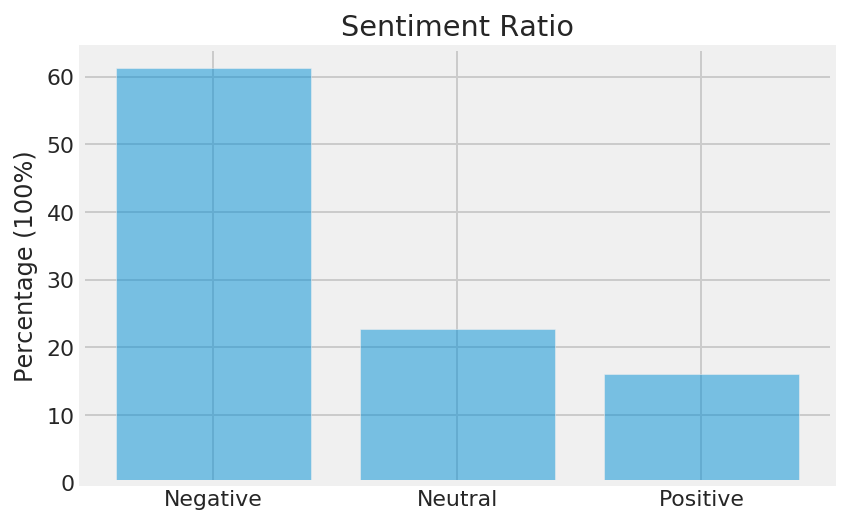

In [63]:
labels = raw_training_data['sentiment'] 
label_count=pd.Series(labels).value_counts()
label_count

review_ratio = [opinion/sum(label_count)*100 for opinion in label_count]
Pos_ratio = label_count['Positive']/sum(label_count)*100

y_pos = range(len(label_count))

import matplotlib.pyplot as plt
plt.bar(y_pos,review_ratio,align='center', alpha=.5)
plt.xticks(y_pos,label_count.index)
plt.ylabel('Percentage (100%)')
plt.title('Sentiment Ratio')

## 2. Initial Preprocessing of Tweets

Twitter data includes different types of special characters, that for this particular analysis, must be treated in the right way. It is important to understand if each character adds noise to the text and should be removed, or if it could actually give relevant information about people's sentiment. Depending on the situation, the character will be removed or labeled.


### Emoticons, URLs, Hashtags and Usernames

* **Emojis** are good representations of facial expression and give very clear hints about the sentiment on a specific matter. Considering this, the emojis will not be removed but instead will be labeled depending on the expression that they are trying to show.

* In the case of **URLs**, **Hashtags** and **Usernames**, we proceed to label them without expecting to obtain too much relevant information on emotion. However, it is still important to consider the presence of this special elements.

* **Punctuation symbols** are not only used to end sentences or separate ideas, but also to show a specific emotional state such as exclamation, interrogation or surprise. Considering this, punctuation symbols that reaffirm emotions are labeled, and punctuation symbols that do not add information, are removed.

In [0]:
# Emoticons
import re
emoticons = \
    [('__EMOT_SMILEY',	[':-)', ':)', '(:', '(-:', ] ),\
     ('__EMOT_LAUGH',		[':-D', ':D', 'X-D', 'XD', 'xD', ] ),\
     ('__EMOT_LOVE',		['<3', ':\*', ] ),\
     ('__EMOT_WINK',		[';-)', ';)', ';-D', ';D', '(;', '(-;', ] ),\
     ('__EMOT_FROWN',		[':-(', ':(', '(:', '(-:', ] ),\
     ('__EMOT_CRY',		[':,(', ':\'(', ':"(', ':(('] ),\
    ]
    
def escape_paren(arr):
    return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

def regex_union(arr):
    return '(' + '|'.join( arr ) + ')'

emoticons_regex = [ (repl, re.compile(regex_union(escape_paren(regx))) ) for (repl, regx) in emoticons ]

In [0]:
#URL
url_regex = re.compile(r"(http|https|ftp)://[a-zA-Z0-9\./]+")
def url_repl(match):
    return '__URL_'+match.group(1).upper()

In [0]:
#Usernames
user_regex = re.compile(r"@(\w+)")
def user_repl(match):
    return '__USER_'+match.group(1).upper()

In [0]:
#Hashtags
hash_regex = re.compile(r"#(\w+)")
def hash_repl(match):
    return '__HASH_'+match.group(1).upper()

In [0]:
word_bound_regex = re.compile(r"\W+")

punctuations = \
    [#('',['.', ] ),\
     #('',[',', ] ),\
     #('',['\'', '\"', ] ),\
     ('__PUNC_EXCL',['!', '¡', ] ),\
     ('__PUNC_QUES',['?', '¿', ] ),\
     ('__PUNC_ELLP',['...', '…', ] ),\
    ]

def punctuations_repl(match):
    text = match.group(0)
    repl = []
    for (key, parr) in punctuations :
        for punc in parr :
            if punc in text:
                repl.append(key)
    if( len(repl)>0 ) :
        return ' '+' '.join(repl)+' '
    else :
        return ' '

### Repetitions

Twitter users do not tend to follow the best grammatical rules or apply writing etiquette for expressing themselves. Repetition of letters is a common practice that may bias the analysis if they are not correctly treated.

In this section, we transform words with repetitions to normal words (helloooooo --> hello).

Subsequently, we apply stemming in order to standardize the text and consider the different word variants as one. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly (most of the time) and often includes the removal of derivational affixes.

In [0]:
# Repeating words 
rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE);
def rpt_repl(match):
    return match.group(1)+match.group(1)

In [0]:
#Stemming
#Porter Stemmer
stemmer = nltk.stem.PorterStemmer()

Now that we have defined the different preprocessing techniques, an initial pipeline function is created to apply them. 

We have also removed the word geopdebate (and any other similar word with the same root form) because it was the most frequent string value used to query the data and was often used following a hashtag. By taking out this word, we would "normalize" the diversity and proportion of words in the tweets. 

In [0]:
# Pipeline function to apply NLP basic Pre-Processing
raw_training_data['text'] = raw_training_data.text.str.replace("GOPDebate", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOPdebate", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOP debate", "")
raw_training_data['text'] = raw_training_data.text.str.replace("Gopdebates", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GopDebates", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOP", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOPDâ", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOPDebatâ", "")
raw_training_data['text'] = raw_training_data.text.str.replace("Gâ", "")
raw_training_data['text'] = raw_training_data.text.str.replace("GOPDâ", "")
raw_training_data['text'] = raw_training_data.text.str.replace("â", "")

#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

#raw_training_data['text'] = raw_training_data['text'].apply(stopwords)
#raw_training_data.head()

def pipeline_1(text):
    
    text = re.sub( hash_regex, hash_repl, text )
    text = re.sub( user_regex, user_repl, text)
    text = re.sub( url_regex, url_repl, text )
    text = re.sub( word_regex, word_repl, text)
    
    for (repl, regx) in emoticons_regex :
        text = re.sub(regx, ' '+repl+' ', text)
    
    text = text.replace('\'','')
    
    text = re.sub( word_bound_regex , punctuations_repl, text )
    text = re.sub( rpt_regex, rpt_repl, text )
    
        
    text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if len(word) >= 3]
    text = [stemmer.stem(w) for w in text]                
    
    return text

In [125]:
raw_training_data['text_processed'] = raw_training_data.text.apply(pipeline_1)
raw_training_data.head()

,candidate,sentiment,subject,retweets,text,location,timezone,text_processed
1,No candidate mentioned,Neutral,None of the above,5,RT @NancyLeeGrahn: How did everyone feel about...,Unknown,Quito,"[__user_nancyleegrahn, how, did, everyon, feel..."
2,Scott Walker,Positive,None of the above,26,RT @ScottWalker: Didn't catch the full # last ...,Unknown,Unknown,"[__user_scottwalk, didnt, catch, the, full, la..."
3,No candidate mentioned,Neutral,None of the above,27,RT @TJMShow: No mention of Tamir Rice and the ...,Unknown,Unknown,"[__user_tjmshow, mention, tamir, rice, and, th..."
4,No candidate mentioned,Positive,None of the above,138,RT @RobGeorge: That Carly Fiorina is trending ...,Texas,Central Time (US & Canada),"[__user_robgeorg, that, carli, fiorina, trend,..."
5,Donald Trump,Positive,None of the above,156,RT @DanScavino: # w/ @realDonaldTrump delivere...,Unknown,Arizona,"[__user_danscavino, __user_realdonaldtrump, de..."


## 3. NLP Processing Techniques 



### N-grams

“N-gram is a continuous sequence of n items from a given sequence of text or speech”. In other words, n-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text.

Three types of N-grams will be applied in order to create an index of how often words follow one another. A bag will be used to store all the different combinations. 

In [0]:
def get_word_features(words):
    bag = {}
    words_uni = [ 'has(%s)'% ug for ug in words ]
    words_bi  = [ 'has(%s)'% ','.join(map(str,bg)) for bg in nltk.bigrams(words) ]
    words_tri = [ 'has(%s)'% ','.join(map(str,tg)) for tg in nltk.trigrams(words) ]
    
    for f in words_uni+words_bi+words_tri:
        bag[f] = 1

    return bag

### Negations

Very specific words are used to show negation but it is important to understand their impact; are they making the sentence a complete negative statement or are they just used in the sentence with no negative implication. That is why defining the most common negations, done in the following function, is important to be able to score words in a sentence and to see how negative the complete sentence is or how this word is impacting the rest. The negation analysis is done following the order of the sentence and also in a reverse way. 

In [0]:
negtn_regex = re.compile( r"""(?:
    ^(?:never|no|nothing|nowhere|noone|none|not|
        havent|hasnt|hadnt|cant|couldnt|shouldnt|
        wont|wouldnt|dont|doesnt|didnt|isnt|arent|aint
    )$
)
|
n't
""", re.X)

def get_negation_features(words):
    INF = 0.0
    negtn = [ bool(negtn_regex.search(w)) for w in words ]

    left = [0.0] * len(words)
    prev = 0.0
    for i in range(0,len(words)):
        if( negtn[i] ):
            prev = 1.0
        left[i] = prev
        prev = max( 0.0, prev-0.1)

    right = [0.0] * len(words)
    prev = 0.0
    for i in reversed(range(0,len(words))):
        if( negtn[i] ):
            prev = 1.0
        right[i] = prev
        prev = max( 0.0, prev-0.1)

    return dict( zip(
                    ['neg_l('+w+')' for w in  words] + ['neg_r('+w+')' for w in  words],
                    left + right ) )

### POS Tagging

POS tagging is an essential part of text processing applications. A POS tagger assigns a tag to each word of its input text specifying its grammatical properties. Thus, the same word can have many different grammatical properties. This helps to further specify and describe the words from the Tweets.

In this analysis, we performed POS Tagging to mark a word to its corresponding speech tag so it is easier to standarize words. 


In [0]:
def get_pos_features(words):
    tags = {}
    tagged_words = [ 'has(%s)'% w+'_'+tag for w,tag in nltk.pos_tag(words)]
    
    for tw in tagged_words:
        tags[tw] = 1

    return tags

A second pipeline function is defined to apply the initial preprocessing and all the NLP techniques mentioned above.

In [0]:
# Pipeline function to apply all the above
def pipeline_2(text):
    features = {}
    
    words = pipeline_1(text)

    word_features = get_word_features(words)
    features.update( word_features )

    negation_features = get_negation_features(words)
    features.update( negation_features )
    
    pos_features = get_pos_features(words)
    features.update( pos_features )

    return features

## 4. Modelling Without Preprocessing

### Baseline Models

In the Deep Learning era, we could be tempted to jump directly to complex architectures since they have proved to yield state of the art results across many domains. However, we should always first create a solid baseline that we’ll need to beat to demonstrate the value of more advanced models.

For this classification problem, two different models will be trained for two baseline scores in order to see which one gives the better result. First a Naive Bayes model will be trained considering Tweets data without any preprocessing. 

#### Naive Bayes

The method is called “naive” because assumes independence between features, i.e. they do not interact. Additionally, there’s an assumption by Bag-of-Words in which the order / position of tokens does not matter. Although, in realilty, both assumptions are unlikely to be true.

In [0]:
#Naive Bayes
training_size = 11000
baseline_train_tweets = [(text.split(" "), sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[:training_size]]
baseline_validation_tweets  = [(text.split(" "), sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[training_size:]]

def extract_baseline_features(words):
    
    bag = {}
    words_uni = [ 'has(%s)'% ug for ug in words ]
    
    for f in words_uni:
        bag[f] = 1

    return bag

v_baseline_train = nltk.classify.apply_features(extract_baseline_features, baseline_train_tweets)
v_baseline_validation = nltk.classify.apply_features(extract_baseline_features, baseline_validation_tweets)

In [0]:
baseline_nb_classifier = nltk.classify.NaiveBayesClassifier
baseline_nb_class = baseline_nb_classifier.train(v_baseline_train)

In [81]:
print("Accuracy of the baseline model = ", nltk.classify.accuracy(baseline_nb_class, v_baseline_validation))

Accuracy of the baseline model =  0.667014977359805


In [82]:
# Most Representative Features
baseline_nb_class.show_most_informative_features(25)

Most Informative Features
              has(next.) = 1              Positi : Negati =    148.7 : 1.0
   has(@donniewahlberg:) = 1              Positi : Negati =    138.7 : 1.0
             has(truth,) = 1              Positi : Negati =    126.2 : 1.0
        has(@lrihendry:) = 1              Positi : Negati =     69.1 : 1.0
        has(#imwithhuck) = 1              Positi : Negati =     66.2 : 1.0
    has(@wilberforce91:) = 1              Positi : Negati =     43.7 : 1.0
          has(@libertyu) = 1              Positi : Negati =     43.7 : 1.0
            has(forward) = 1              Positi : Negati =     39.5 : 1.0
              has("fair) = 1              Negati : Positi =     35.7 : 1.0
          has(balanced") = 1              Negati : Positi =     35.7 : 1.0
             has(brain,) = 1              Positi : Negati =     31.2 : 1.0
                has((in) = 1              Positi : Negati =     28.7 : 1.0
                has(do.) = 1              Positi : Negati =     28.0 : 1.0

### Maximum Entropy (MaxEnt)

The second baseline model's score will be calculated based on MaxEnt. Again, for the baseline, the model will be trained only using Tweets data without any preprocessing. 

This framework considers all of the probability distributions that are empirically consistent with the training data; and chooses the distribution with the highest entropy.

In [83]:
#MaxEnt Classifier
max_ent_c = nltk.classify.MaxentClassifier
max_ent_cl = max_ent_c.train(v_baseline_train, algorithm='IIS', max_iter=10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.160
             2          -0.62600        0.710
             3          -0.51644        0.823
             4          -0.44624        0.875
             5          -0.39651        0.901
             6          -0.35901        0.919
             7          -0.32951        0.930
             8          -0.30554        0.937
             9          -0.28562        0.943
         Final          -0.26873        0.948


In [84]:
print("Accuracy of the model = ", nltk.classify.accuracy(max_ent_cl, v_baseline_validation))

Accuracy of the model =  0.6973180076628352


In [85]:
max_ent_cl.show_most_informative_features(25)

   3.349 has(trumptastic)==1 and label is 'Positive'
   3.161 has(showdown)==1 and label is 'Neutral'
   2.947 has(stinks)==1 and label is 'Negative'
   2.895 has(https://t.co/r5ozztaeab)==1 and label is 'Positive'
   2.825 has(https://t.co/ygrnilseuj)==1 and label is 'Negative'
   2.818 has(huckabee...what!?!?!?#s)==1 and label is 'Negative'
   2.810 has(http://t.co/zfpybzvcmk)==1 and label is 'Neutral'
   2.796 has(ben!)==1 and label is 'Positive'
   2.739 has(@michellemacfnc)==1 and label is 'Neutral'
  -2.709 has(@monaeltahawy:)==1 and label is 'Positive'
   2.701 has(campground)==1 and label is 'Positive'
   2.655 has(awesome!!!!)==1 and label is 'Positive'
   2.606 has(enjoy.)==1 and label is 'Positive'
   2.568 has(https://t.co/xvviad5bvh)==1 and label is 'Neutral'
   2.528 has(#clowncar2016)==1 and label is 'Neutral'
   2.518 has(http://t.co/x8v9vbulc6)==1 and label is 'Neutral'
   2.516 has(chill.)==1 and label is 'Positive'
   2.487 has(http://t.co/rkndh7xbuo)==1 and label is

## 5. Modelling With Processing (Basic and NLP Processed Data)

As the MaxEnt classifier gave a higher accuracy for the baseline, for validation, we will continue using this algorithm to train the model with processed data to see if: 
- 1) The results improve
- 2) Understand what words are the most significant

In [0]:
# Apply the data processing and cleaning extraction methodologies
training_size = 11000
train_tweets = [(text, sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[:training_size]]
validation_tweets  = [(text, sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[training_size:]]
v_train = nltk.classify.apply_features(pipeline_2,train_tweets)
v_validation  = nltk.classify.apply_features(pipeline_2,validation_tweets)

In [29]:
#MaxEnt Classifier
max_ent_classifier = nltk.classify.MaxentClassifier
max_ent_class = max_ent_classifier.train(v_train, algorithm='IIS', max_iter=10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.160
             2          -0.60769        0.716
             3          -0.48954        0.856
             4          -0.41436        0.917
             5          -0.36184        0.942
             6          -0.32294        0.952
             7          -0.29288        0.958
             8          -0.26891        0.962
             9          -0.24932        0.963
         Final          -0.23300        0.965


In [30]:
print("Accuracy of the model = ", nltk.classify.accuracy(max_ent_class, v_validation))

Accuracy of the model =  0.7154301637060257


In [31]:
max_ent_class.show_most_informative_features(25)

   1.842 has(someth,someth)==1 and label is 'Neutral'
   1.178 has(exactli,__url)==1 and label is 'Negative'
   1.155 has(lmfao,__url)==1 and label is 'Negative'
   1.127 has(weak,__hash_)==1 and label is 'Negative'
   1.104 has(fact,__url)==1 and label is 'Neutral'
   1.082 has(failur,__url)==1 and label is 'Negative'
   1.062 has(trumptast)==1 and label is 'Positive'
   1.062 neg_l(trumptast)==0.0 and label is 'Positive'
   1.062 neg_r(trumptast)==0.0 and label is 'Positive'
   1.062 has(trumptast)_NN==1 and label is 'Positive'
   0.907 has(just,embarrass)==1 and label is 'Negative'
   0.898 has(true,__url,__url)==1 and label is 'Negative'
   0.890 has(__user_2noam,god)==1 and label is 'Negative'
   0.890 has(__user_2noam)_NN==1 and label is 'Negative'
   0.823 has(best,moment,__url)==1 and label is 'Neutral'
   0.792 has(trump,funni)==1 and label is 'Positive'
   0.792 has(donald,trump,funni)==1 and label is 'Positive'
   0.790 has(the,second,__url)==1 and label is 'Negative'
   0.7

Now, when calculating the model's score with the preprocessed data, we can see that it slightly improves from 69% to 71%. Thus, we will look into other methods to potentially increase further this score. 

## 6. Creating Additional Features

### SentiWordNet

Another NLP technique will be used to create features giving more information about the sentiment in the data. 

Before explaining how this will be used it is important to understand that a synset is a synonym that could be changed in a specific context without affecting the real value of the proposition in which it is embedded.

SentiWordNet gives an automatic annotation to all the synsets of a wordnet (lexical database) according to different notions such as positivity, neutrality and negativity. A synset is associated to a score which indicates how the terms in the synset tend to be more positive or negative, etc.

This annotations will be included as new features for the model and see if it improves the results. 


In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
nltk.download('sentiwordnet')
 
lemmatizer = WordNetLemmatizer()
 
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def swn_polarity(text):
    sentiment = 0.0
    tokens_count = 0
  
    tagged_sentence = pos_tag(word_tokenize(str(text.encode('utf-8'), errors='ignore')))
    sentiment = {}
    for word, tag in tagged_sentence:
        
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            sentiment["sent("+word+")"] = 0.0
            continue
        
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            sentiment["sent("+word+")"] = 0.0
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            sentiment["sent("+word+")"] = 0.0
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment["sent("+word+")"] = swn_synset.pos_score() - swn_synset.neg_score()
        
    return sentiment

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [0]:
def pipeline_3(text):
    features = {}
    
    words = pipeline_1(text)
    
    sentiment_features = swn_polarity(text)
    features.update(sentiment_features)
    
    word_features = get_word_features(words)
    features.update( word_features )

    negation_features = get_negation_features(words)
    features.update( negation_features )
        
    pos_features = get_pos_features(words)
    features.update( pos_features )

    return features

With the created pipeline, now lets apply the additional features to the dataset and train the model.

In [0]:
# Apply the data processing and cleaning extraction methodologies
train_tweets = [(text, sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[:training_size]]
validation_tweets  = [(text, sentiment) for text, sentiment in raw_training_data[['text', 'sentiment']].values[training_size:]]

v_train_sentiment = nltk.classify.apply_features(pipeline_3,train_tweets)
v_validation_sentiment  = nltk.classify.apply_features(pipeline_3,validation_tweets)

In [35]:
# Train a new MaxEnt classfier with the sentiment features
import nltk
nltk.download('punkt')
nltk.download('wordnet')
max_ent_classifier = nltk.classify.MaxentClassifier
max_ent_class = max_ent_classifier.train(v_train_sentiment, algorithm='IIS', max_iter=10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.160
             2          -0.62644        0.687
             3          -0.51361        0.822
             4          -0.43884        0.897
             5          -0.38537        0.928
             6          -0.34513        0.945
             7          -0.31369        0.953
             8          -0.28839        0.959
             9          -0.26756        0.962
         Final          -0.25011        0.964


In [36]:
print("Accuracy of the model = ", nltk.classify.accuracy(max_ent_class, v_validation_sentiment))

Accuracy of the model =  0.7161267850923023


In [37]:
# build confusion matrix over validation set
test_truth   = [s for (t,s) in v_validation_sentiment]
test_predict = [max_ent_class.classify(t) for (t,s) in v_validation_sentiment]

print('Confusion Matrix')
print()
print(nltk.ConfusionMatrix( test_truth, test_predict ))

Confusion Matrix

         |    N         P |
         |    e    N    o |
         |    g    e    s |
         |    a    u    i |
         |    t    t    t |
         |    i    r    i |
         |    v    a    v |
         |    e    l    e |
---------+----------------+
Negative |<1759>  46   96 |
 Neutral |  369  <69>  54 |
Positive |  243    7 <228>|
---------+----------------+
(row = reference; col = test)



As we can see, the additional features barely increased the model's score. Thus, these do not have much impact on the model. 

### Understanding Most Important Words

Following the training of our model, we also want to understand which of the words in the dataset are the most important.

In [0]:
import time
import re
import pandas as pd
import nltk
import numpy as np
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    #remove gopdebate and variants 
    lst = np.core.defchararray.replace(lst, "GOPDebate", " ")
    lst = np.core.defchararray.replace(lst, "GOPdebate", " ")
    lst = np.core.defchararray.replace(lst, "GOP debate", " ")
    lst = np.core.defchararray.replace(lst, "gopdebate", " ")
    lst = np.core.defchararray.replace(lst, "Gopdebates", " ")
    lst = np.core.defchararray.replace(lst, "GopDebates", " ")
    lst = np.core.defchararray.replace(lst, "GOP", " ")
    lst = np.core.defchararray.replace(lst, "GOPDâ", " ")
    lst = np.core.defchararray.replace(lst, "GOPDebatâ", " ")
    lst = np.core.defchararray.replace(lst, "Gâ", " ")
    lst = np.core.defchararray.replace(lst, "GOPDâ", " ")
    lst = np.core.defchararray.replace(lst, "â", " ")
    lst = np.core.defchararray.replace(lst, "last night", " ")
    lst = np.core.defchararray.replace(lst, "rt", " ")

    
    return lst

raw_training_data['text_2'] =  clean_tweets(raw_training_data['text'])

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    

#### Most Import Words: Positive Tweets

Here, we visualized the results for the most important words when considering positive Tweets.

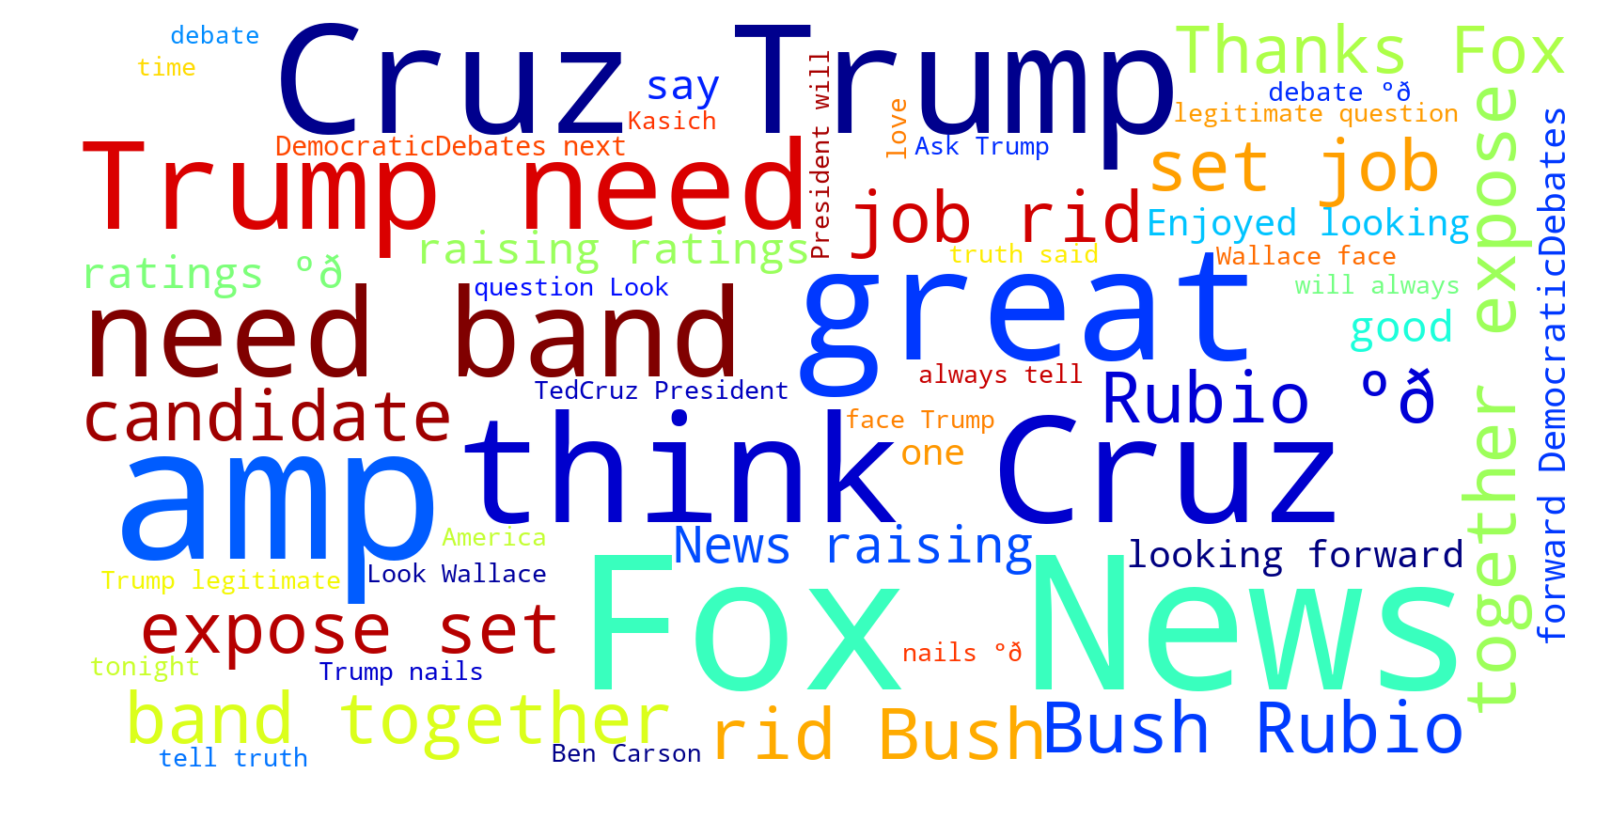

In [115]:
tws_pos = raw_training_data['text_2'][raw_training_data['sentiment'] == 'Positive']
word_cloud(tws_pos)

#### Most Import Words: Negative Tweets

Here, we visualized the results for the most important words when considering negative Tweets. Both negative and positive Tweets have similarities in their results. However, positive Tweets refer more to Ted Cruz and containt more positive words like great, think, loking forward, etc. 

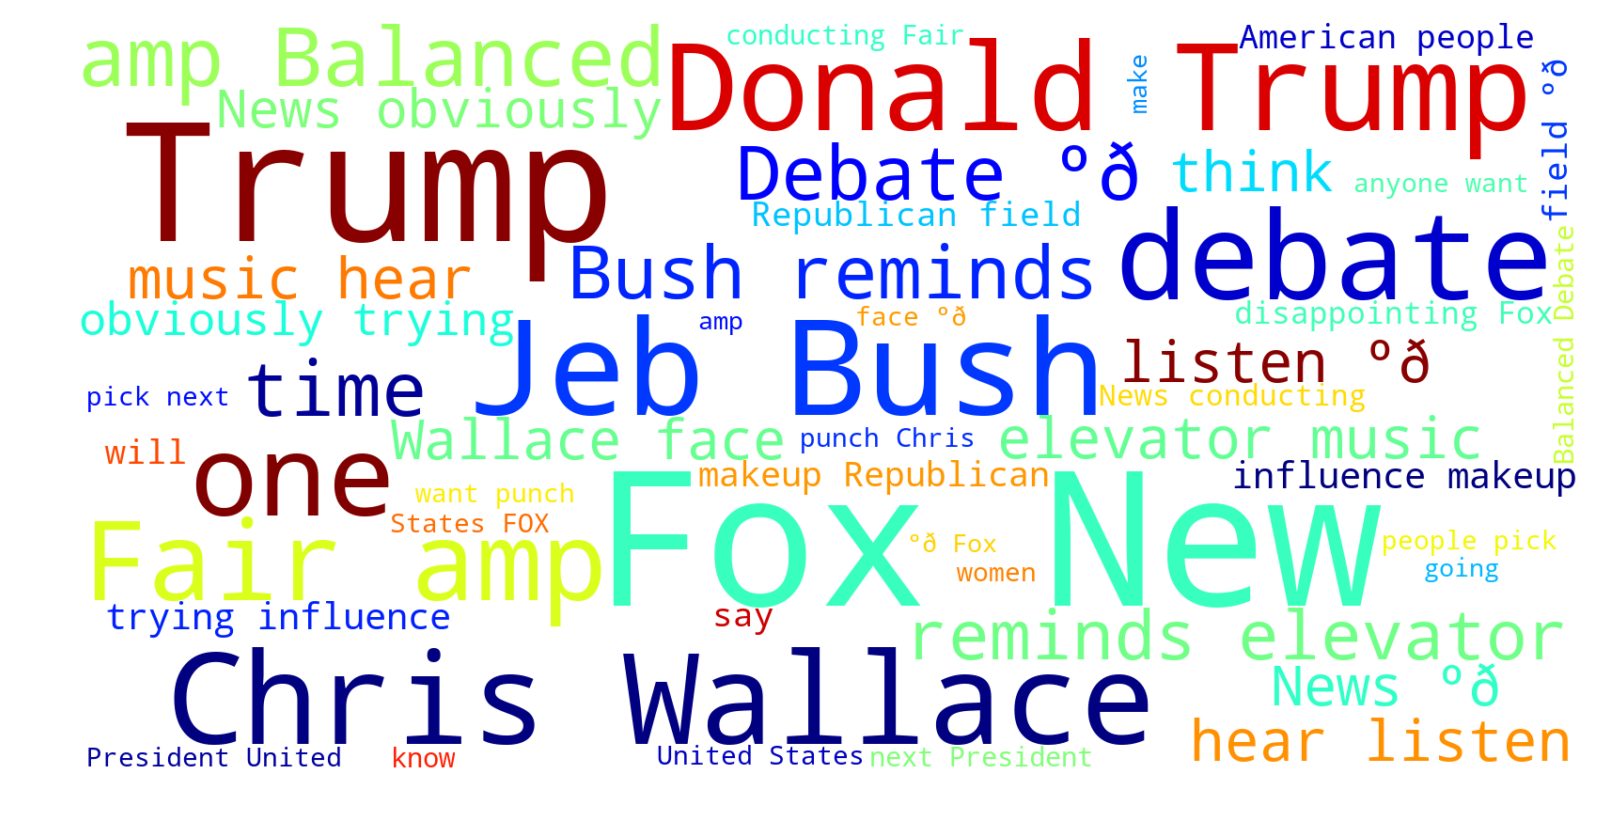

In [116]:
tws_neg = raw_training_data['text_2'][raw_training_data['sentiment'] == 'Negative']
word_cloud(tws_neg)

### Understanding Most Popular Hashtags

Following the identification of the most important words, we also want to understand which of the hashtags in the dataset are the most important. 

In [0]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
  
raw_training_data['text_3'] =  clean_tweets(raw_training_data['text'])  
# extracting hashtags from positive 
HT_positive = hashtag_extract(raw_training_data['text_3'][raw_training_data['sentiment'] == 'Positive'])
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(raw_training_data['text_3'][raw_training_data['sentiment'] == 'Negative'])
# extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(raw_training_data['text_3'][raw_training_data['sentiment'] == 'Neutral'])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

#### Most Popular Hashtags: Positive Tweets


Here, we visualized the results for the most important hashtags when considering positive Tweets. TedCruz is the most popular hashtag when it comes to positive Tweets. However, it is surprising that Trump in quite frequent as well.

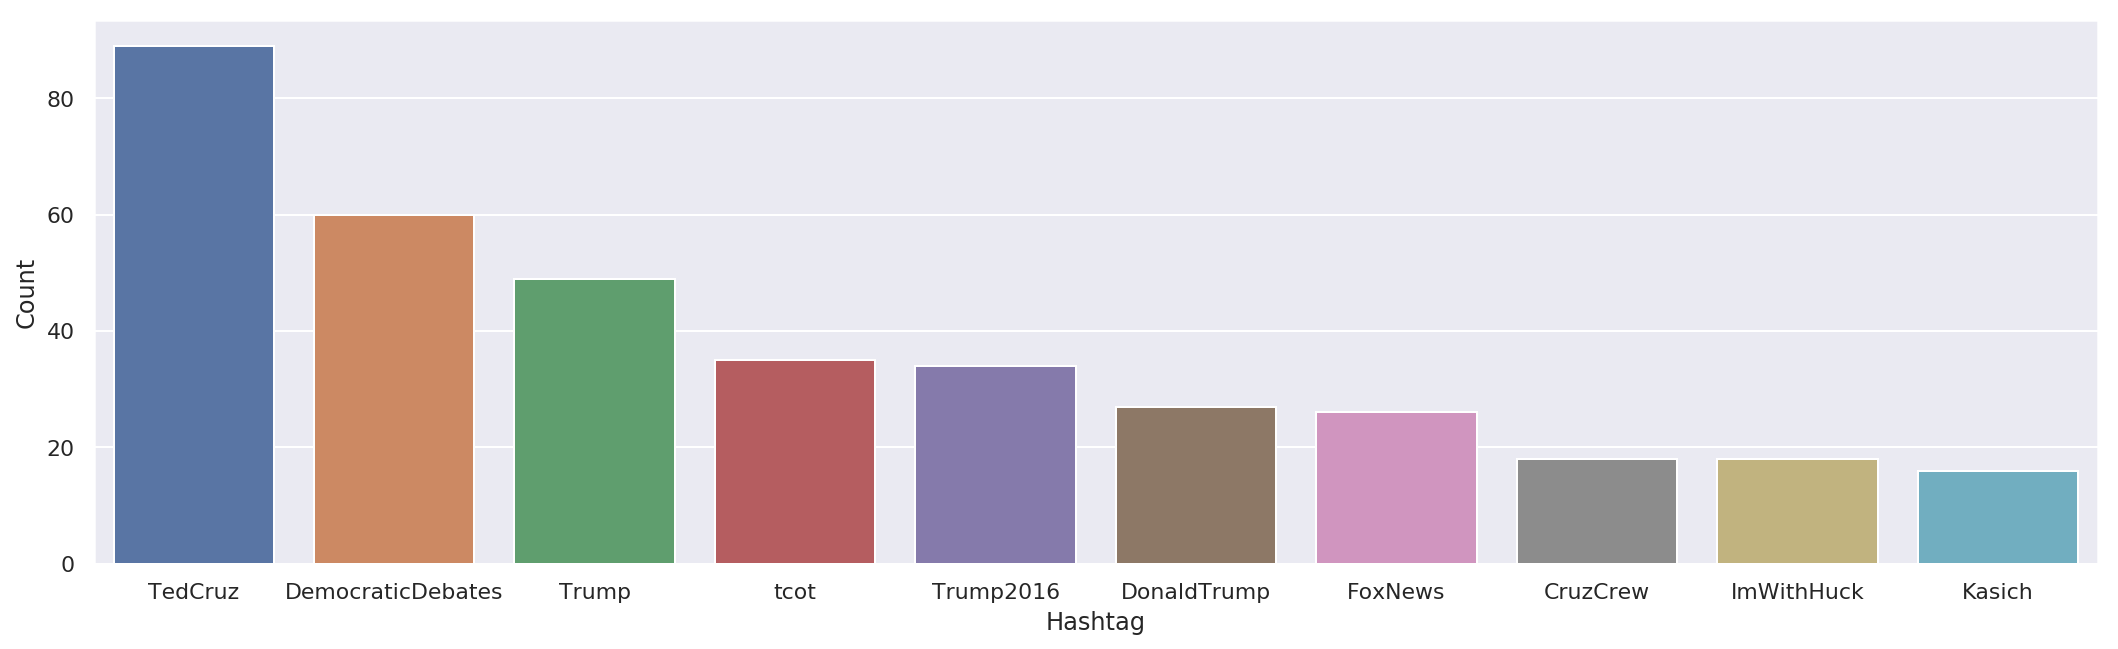

In [118]:
#Positive
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Most Popular Hashtags: Negative Tweets


Here, we visualized the results for the most important hashtags when considering negative Tweets. Not surprisingly, Trump is the most popular hashtag for negative tweets, followed by #tcot. #tcot is a hashtag that stands for Top Conservatives on Twitter.

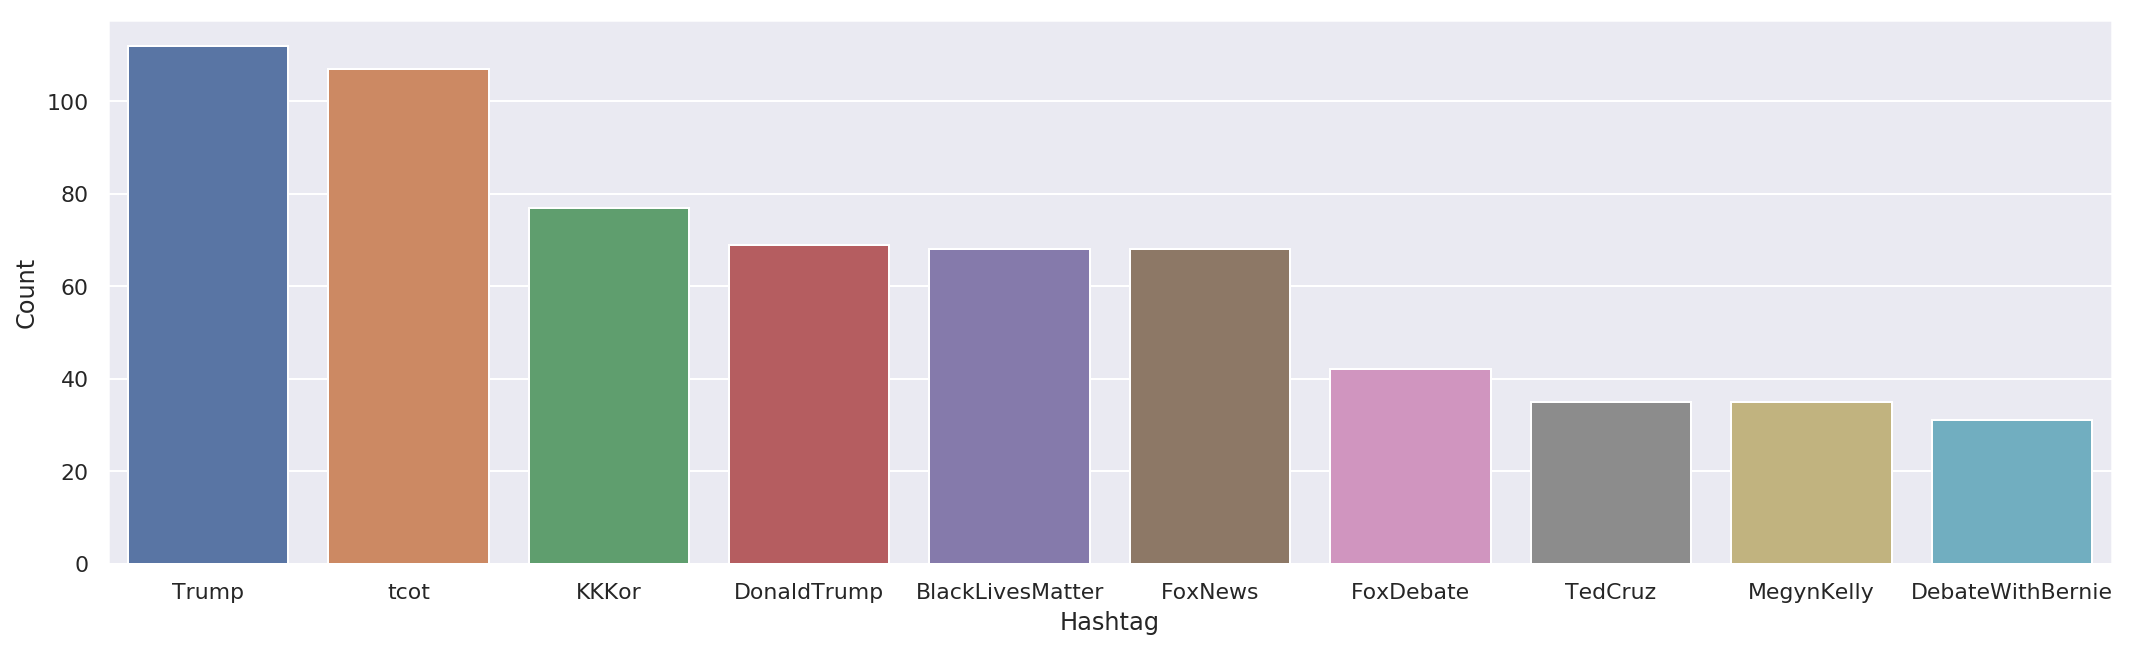

In [119]:
#Negative
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## 7. Results and Future Uses

Following our training, our model is capable of capturing the sentiment of Tweets, with a 72% accuracy, of the 2016 GOP Debate. In the future, this model could be applied to other debates or political events to: 
- 1) Quantify the sentiment of the Tweets 
- 2) Understand which words contain more mentions and the impact (good or bad) they have on a particular topic

This is the base to understanding the audience and helping campaign organizers to improve speeches with key words or topics that will give a candidate a competitive advantage (by reaching more people). 

# B. Sentiment Analysis with Neural Network

As seen earlier, when performing a sentiment analysis with the available resources such as NLTK sentiment classifier and other resource available in python, our team was disappointed by the performance of these models. At most, we got 71.6% accuracy on our classification task.

Hence, we started researching about ways to increase my model performance. One of the obvious choices was to build a neural network.

## Import the Librairies
First, we will import all the necessary librairies for the extent for this analysis. Some of these librairies include packages like numpy and matplotlib.

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os.path
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load the Dataset

As an initial and basic step, Twitter data is loaded, this time with the labels being coded as: Positive = 2,  Neutral = 1 and Negative = 0. 

In [46]:
def loadDataset(in_file):
    my_path = os.getcwd()
    path = os.path.join(my_path, in_file)
    column_names = ['candidate','sentiment', 'subject', 'retweets', 'text', 'location', 'timezone']
    tweets = pd.read_csv(path, delimiter=',', quotechar='"', header= None, names= column_names, encoding="ISO-8859-1")

    print('Readed ', len(tweets), "tweets")
    return tweets

df = loadDataset("Sentiment_5.csv")
df.head()

Readed  13871 tweets


,candidate,sentiment,subject,retweets,text,location,timezone
1,No candidate mentioned,1,None of the above,5,RT @NancyLeeGrahn: How did everyone feel about...,Unknown,Quito
2,Scott Walker,2,None of the above,26,RT @ScottWalker: Didn't catch the full #GOPdeb...,Unknown,Unknown
3,No candidate mentioned,1,None of the above,27,RT @TJMShow: No mention of Tamir Rice and the ...,Unknown,Unknown
4,No candidate mentioned,2,None of the above,138,RT @RobGeorge: That Carly Fiorina is trending ...,Texas,Central Time (US & Canada)
5,Donald Trump,2,None of the above,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Unknown,Arizona


## 2. Initial Preprocessing of Tweets

Text column is cleaned again by removing all special characters and two datasets are created in order to train and test the neural network. 

In [47]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 7 columns):
candidate    13871 non-null object
sentiment    13871 non-null int64
subject      13871 non-null object
retweets     13871 non-null int64
text         13871 non-null object
location     13871 non-null object
timezone     13871 non-null object
dtypes: int64(2), object(5)
memory usage: 758.6+ KB


In [0]:
import string
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
  
df['text_2'] =  df.text.apply(strip_all_entities)

In [0]:
x = df.text_2
y = df.sentiment

In [0]:
#Train-Test Split
from sklearn.model_selection import train_test_split

SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

## 3. Modelling and Training

Two Word2Vec models are initially trained with Tweets data; the first one using a Continuous Bag of Words and the second with Skip Gram models. 

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

With the results of the two previously trained models, for each word, two vector are concatenated so a bigger dimensional represention of each word would be used to train the Neural Network. 


In [50]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result


all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

for epoch in range(500):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha
    

100%|██████████| 13871/13871 [00:00<00:00, 1676488.80it/s]


Before training the word2vec models, TF-IDF is used as a way of weighting each word. It assigns a scalar value to each word in a vocabulary and so it will be used as a weighting factor of each word vectors. 

To get the Tfidf value for each word, a dictionary will be created containing pairs of each word with its Tfidf value. 

This step of assigning a unique integer to words in the dataset is crucial because we can not feed in string data into a neural network. Instead, we use integers to represent whole sentences. In addition, a neural network can neither take a string or a single integer value as input. Instead, we must use Word Embeddings.

Word Embeddings are a vector representations that capture the context of the underlying words in relation to other words in the sentence. This transformation results in words having similar meaning being clustered closer together in the hyperplane and distinct words positioned further away in the hyperplane.

In [51]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=2)
tvec.fit_transform(x_train)
tfidf = dict(zip(tvec.get_feature_names(), tvec.idf_))

def get_w2v_general(tweet, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

train_vecs_cbow_mean = scale(np.concatenate([get_w2v_general(z, 100, model_ug_cbow,'mean') for z in x_train]))
validation_vecs_cbow_mean = scale(np.concatenate([get_w2v_general(z, 100, model_ug_cbow,'mean') for z in x_validation]))

clf = LogisticRegression()
clf.fit(train_vecs_cbow_mean, y_train)

clf.score(validation_vecs_cbow_mean, y_validation)

model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

for epoch in range(500):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 13871/13871 [00:00<00:00, 1262788.48it/s]


In [52]:
train_vecs_sg_mean = scale(np.concatenate([get_w2v_general(z, 100, model_ug_sg,'mean') for z in x_train]))
validation_vecs_sg_mean = scale(np.concatenate([get_w2v_general(z, 100, model_ug_sg,'mean') for z in x_validation]))

clf = LogisticRegression()
clf.fit(train_vecs_sg_mean, y_train)

clf.score(validation_vecs_sg_mean, y_validation)

def get_w2v_mean(tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += np.append(model_ug_cbow[word],model_ug_sg[word]).reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

train_vecs_cbowsg_mean = scale(np.concatenate([get_w2v_mean(z, 200) for z in x_train]))
validation_vecs_cbowsg_mean = scale(np.concatenate([get_w2v_mean(z, 200) for z in x_validation]))

clf = LogisticRegression()
clf.fit(train_vecs_cbowsg_mean, y_train)

clf.score(validation_vecs_cbowsg_mean, y_validation)

def get_w2v_sum(tweet, size):
    vec = np.zeros(size).reshape((1, size))
    for word in tweet.split():
        try:
            vec += np.append(model_ug_cbow[word],model_ug_sg[word]).reshape((1, size))
        except KeyError:
            continue
    return vec

train_vecs_cbowsg_sum = scale(np.concatenate([get_w2v_sum(z, 200) for z in x_train]))
validation_vecs_cbowsg_sum = scale(np.concatenate([get_w2v_sum(z, 200) for z in x_validation]))

clf = LogisticRegression()
clf.fit(train_vecs_cbowsg_sum, y_train)

clf.score(validation_vecs_cbowsg_sum, y_validation)

0.6474820143884892

### Model Architecture

Now that the Word2Vec model is trained with Logistic Regression , this will be used to feed the Neural Network model to classify each Tweet giving an output for this Sentiment Analysis stage.  The objective is to compare if this gives better results than traditional NLP and Machine Learning techniques. 

The Neuronal Network architecture to be use is 3 hidden layers with 256 hidden nodes at each hidden layer.

We also need to import the required libraries for the complete analysis. Keras, in language modeling, is an important library to import because it is a deep learning framework that contains other deep learning frameworks. It will be useful when creating our neural network. 

In [59]:
train_w2v_final = train_vecs_cbowsg_sum
validation_w2v_final = validation_vecs_cbowsg_sum

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Activation, Dense

filepath="w2v_01_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max') 
callbacks_list = [checkpoint, early_stop]
np.random.seed(7)
model_w2v_01 = Sequential()
model_w2v_01.add(Dense(256, activation='relu', input_dim=200))
model_w2v_01.add(Dense(256, activation='relu'))
model_w2v_01.add(Dense(256, activation='relu'))
model_w2v_01.add(Dense(1, activation='sigmoid'))
model_w2v_01.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_01.fit(train_w2v_final, y_train, validation_data=(validation_w2v_final, y_validation), 
                 epochs=100, batch_size=32, verbose=2, callbacks=callbacks_list)

Train on 13593 samples, validate on 139 samples
Epoch 1/100
 - 2s - loss: 0.4737 - acc: 0.4504 - val_loss: 0.1414 - val_acc: 0.4029

Epoch 00001: val_acc improved from -inf to 0.40288, saving model to w2v_01_best_weights.01-0.4029.hdf5
Epoch 2/100
 - 2s - loss: 0.2766 - acc: 0.4756 - val_loss: 0.2995 - val_acc: 0.4388

Epoch 00002: val_acc improved from 0.40288 to 0.43885, saving model to w2v_01_best_weights.02-0.4388.hdf5
Epoch 3/100
 - 2s - loss: 0.2297 - acc: 0.4833 - val_loss: 0.2195 - val_acc: 0.4964

Epoch 00003: val_acc improved from 0.43885 to 0.49640, saving model to w2v_01_best_weights.03-0.4964.hdf5
Epoch 4/100
 - 2s - loss: 0.1916 - acc: 0.4981 - val_loss: 0.1036 - val_acc: 0.5252

Epoch 00004: val_acc improved from 0.49640 to 0.52518, saving model to w2v_01_best_weights.04-0.5252.hdf5
Epoch 5/100
 - 2s - loss: 0.1595 - acc: 0.4980 - val_loss: 0.0851 - val_acc: 0.4604

Epoch 00005: val_acc did not improve from 0.52518
Epoch 6/100
 - 2s - loss: 0.1257 - acc: 0.5065 - val_los

## 4. Results

We trained the model with 100 epochs but stopped at epoch 13. 

After different attempts, the best performing weights on validation accuracy were saved so we can see the final result of the Neuronal Network trained. 

Unfortunately, the model did not perform as well as the standard NLP approach. We obtained an accuracy of 54.6% versus 71.6%. 

In [60]:
from keras.models import load_model
loaded_w2v_model = load_model('w2v_01_best_weights.13-0.5468.hdf5')

loaded_w2v_model.evaluate(x=validation_w2v_final, y=y_validation)

139/139 [==============================] - 0s 1ms/step


[-0.30502450251750807, 0.5467625907856783]

# Conclusion for Sentiment Analysis

Following our analysis, we have come to the conclusion that the NLP standard approach, for this particular dataset, is better capable of better capturing the sentiment analysis (higher accuracy score).  

One of the reasons why the NN might not be performing as well is that it is a model that is difficult to train. The model has the capacity to learn from long sequences to retain information about their hidden state for a long time. However, our Tweets have short sequences, thus difficult to efficiently use this ability. In addition, it is computationally very expensive to train many iterations (takes a lot of time and power).

Plus, another problem is that the model may be learning something we don't expect without knowing it.

In the end, sentiment analysis can help to automatically transform the unstructured information into structured data of public opinions about products, services, brands, politics or any other topic that people can express opinions about. This data can also be very useful for commercial applications like marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service.

Now that our model is capable of scoring our data, in our next notebook, we will explore the process of Text Generation. Text Generation will give us an exact output of words and will predict the future Tweets regarding some topics.

### Sourced Information

https://towardsdatascience.com/sentiment-analysis-for-text-with-deep-learning-2f0a0c6472b5


https://towardsdatascience.com/sentiment-analysis-with-deep-learning-62d4d0166ef6

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-10-neural-network-with-a6441269aa3c